# random things

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/epochs.csv')

In [3]:
print(df.columns)
print(df.shape)

Index(['userId', 'userAccessToken', 'summaryId', 'activityType',
       'activeKilocalories', 'steps', 'distanceInMeters', 'durationInSeconds',
       'activeTimeInSeconds', 'startTimeInSeconds', 'startTimeOffsetInSeconds',
       'met', 'intensity', 'meanMotionIntensity', 'maxMotionIntensity'],
      dtype='object')
(2119020, 15)


In [4]:
df.head()

,userId,userAccessToken,summaryId,activityType,activeKilocalories,steps,distanceInMeters,durationInSeconds,activeTimeInSeconds,startTimeInSeconds,startTimeOffsetInSeconds,met,intensity,meanMotionIntensity,maxMotionIntensity
0,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-626066e3-6,WALKING,93,1506,125.73,900.0,860,1650484963,-18000,11.544035,HIGHLY_ACTIVE,2.411726,4.152604
1,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-62606a67-6,WALKING,3,1174,207.00,900.0,584,1650485863,-18000,42.362816,HIGHLY_ACTIVE,3.986872,5.518433
2,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-62606a67-8,SEDENTARY,0,0,0.00,900.0,143,1650485863,-18000,1.000000,SEDENTARY,0.000000,0.000000
3,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-62606deb-6,WALKING,41,1363,222.45,900.0,188,1650486763,-18000,44.880870,HIGHLY_ACTIVE,3.548326,3.323441
4,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-6260716f-6,WALKING,73,1755,461.11,900.0,269,1650487663,-18000,6.175430,HIGHLY_ACTIVE,5.397980,6.647376


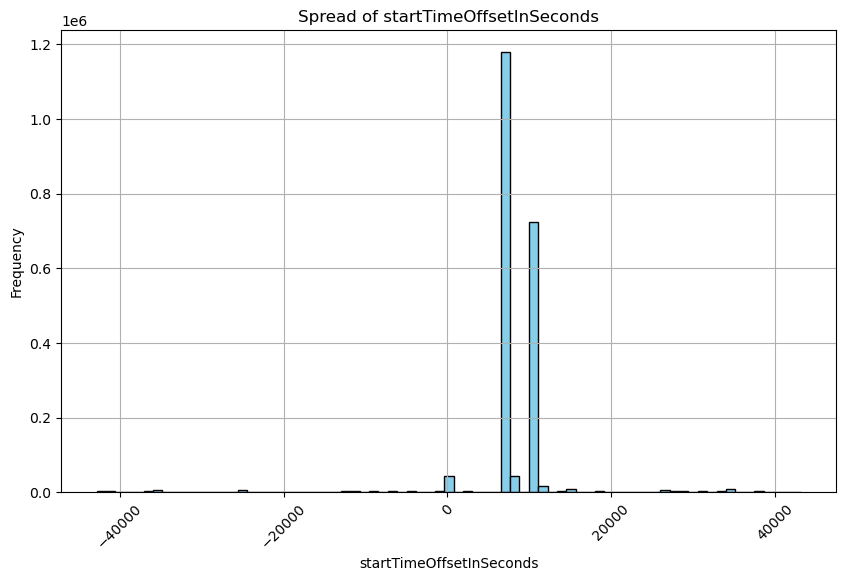

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['startTimeOffsetInSeconds'], bins=75, color='skyblue', edgecolor='black')
plt.title('Spread of startTimeOffsetInSeconds')
plt.xlabel('startTimeOffsetInSeconds')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
df['startTimeOffsetInSeconds'].value_counts()

startTimeOffsetInSeconds
 7200     1179156
 10800     724836
 0          43503
 8100       43135
 11700      15988
           ...   
-29100         80
 3600          72
-26100         61
-9660          57
 6300          55
Name: count, Length: 75, dtype: int64

In [7]:
(df['startTimeOffsetInSeconds'].value_counts().iloc[0] + df['startTimeOffsetInSeconds'].value_counts().iloc[1]) / df['startTimeOffsetInSeconds'].value_counts().sum()

0.8985247897613048

In [9]:
# df2 = df.copy()
df['startTimeLocal'] = pd.to_datetime(df['startTimeInSeconds'] + df['startTimeOffsetInSeconds'], unit='s')
df['WeekNumberLocal'] = df['startTimeLocal'].apply(get_week_number)
df.head()

,userId,userAccessToken,summaryId,activityType,activeKilocalories,steps,distanceInMeters,durationInSeconds,activeTimeInSeconds,startTimeInSeconds,startTimeOffsetInSeconds,met,intensity,meanMotionIntensity,maxMotionIntensity,startTimeLocal,WeekNumberLocal
0,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-626066e3-6,WALKING,93,1506,125.73,900.0,860,1650484963,-18000,11.544035,HIGHLY_ACTIVE,2.411726,4.152604,2022-04-20 15:02:43,15
1,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-62606a67-6,WALKING,3,1174,207.00,900.0,584,1650485863,-18000,42.362816,HIGHLY_ACTIVE,3.986872,5.518433,2022-04-20 15:17:43,15
2,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-62606a67-8,SEDENTARY,0,0,0.00,900.0,143,1650485863,-18000,1.000000,SEDENTARY,0.000000,0.000000,2022-04-20 15:17:43,15
3,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-62606deb-6,WALKING,41,1363,222.45,900.0,188,1650486763,-18000,44.880870,HIGHLY_ACTIVE,3.548326,3.323441,2022-04-20 15:32:43,15
4,e31d5fa7-7a63-43a6-973a-f2169c0661f7,69420bd2-052d-4df2-9ba1-55d9b2fd7489,sd46aeb3d-6260716f-6,WALKING,73,1755,461.11,900.0,269,1650487663,-18000,6.175430,HIGHLY_ACTIVE,5.397980,6.647376,2022-04-20 15:47:43,15


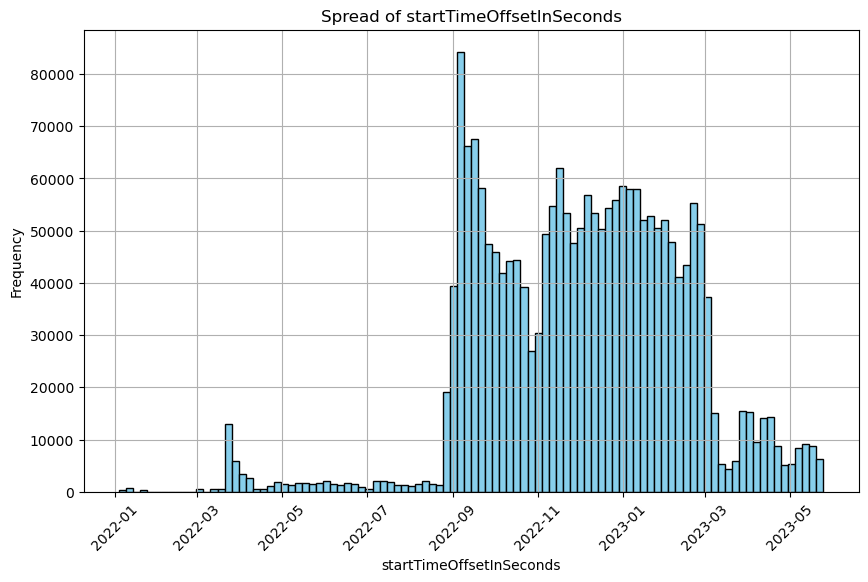

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['startTimeLocal'], bins=100, color='skyblue', edgecolor='black')
plt.title('Spread of startTimeOffsetInSeconds')
plt.xlabel('startTimeOffsetInSeconds')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

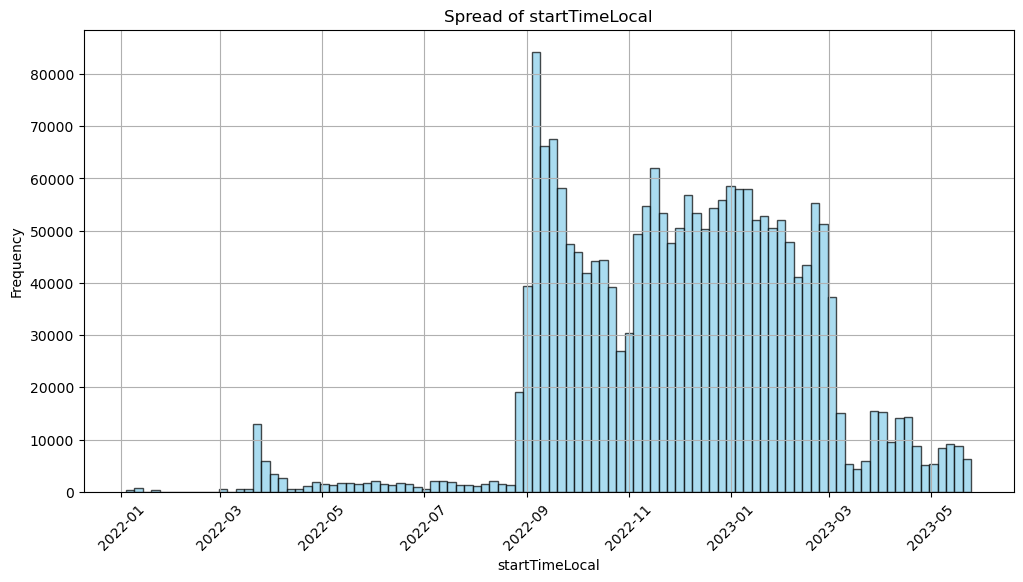

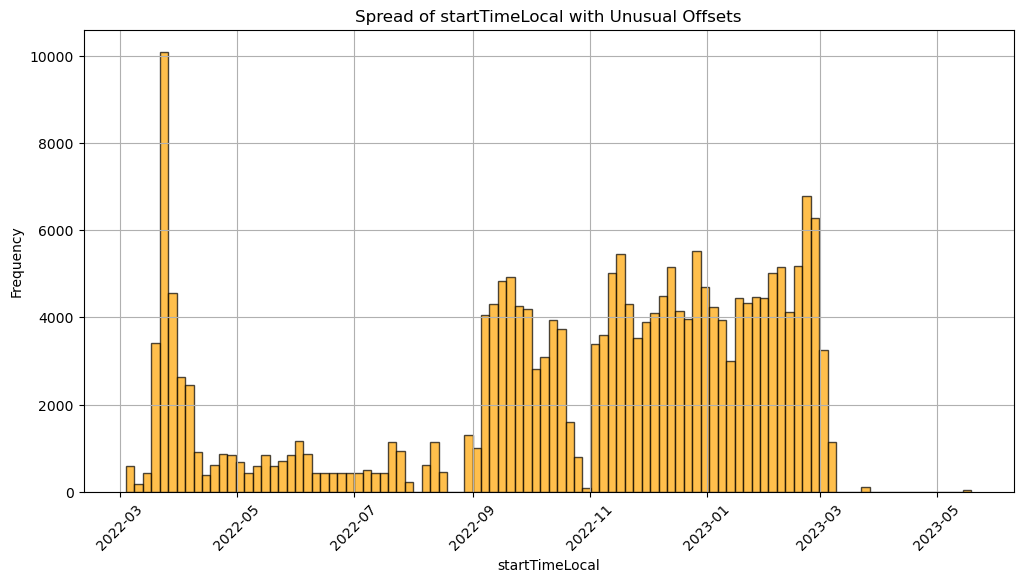

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure startTimeLocal is a datetime object
df['startTimeLocal'] = pd.to_datetime(df['startTimeLocal'])

# Filter the dataset for unusual offsets
unusual_offsets = df[~df['startTimeOffsetInSeconds'].isin([7200, 10800])]

# Plot the histogram for startTimeLocal
plt.figure(figsize=(12, 6))
plt.hist(df['startTimeLocal'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Spread of startTimeLocal')
plt.xlabel('startTimeLocal')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot the histogram for startTimeLocal of unusual offsets
plt.figure(figsize=(12, 6))
plt.hist(unusual_offsets['startTimeLocal'], bins=100, color='orange', edgecolor='black', alpha=0.7)
plt.title('Spread of startTimeLocal with Unusual Offsets')
plt.xlabel('startTimeLocal')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [25]:
# Filter the dataset for unusual offsets
unusual_offsets = df[~df['startTimeOffsetInSeconds'].isin([7200, 10800])]

# Filter for dates after 2022-08
unusual_offsets_after_august = unusual_offsets[unusual_offsets['startTimeLocal'] > '2022-08-01']

# Calculate the percentage
percentage_after_august = (len(unusual_offsets_after_august) / len(unusual_offsets)) * 100

print(f"Percentage of unusual offsets occurring after 2022-08: {percentage_after_august:.2f}%")

Percentage of unusual offsets occurring after 2022-08: 81.02%


percentage of removed examples: 0.10147521023869524


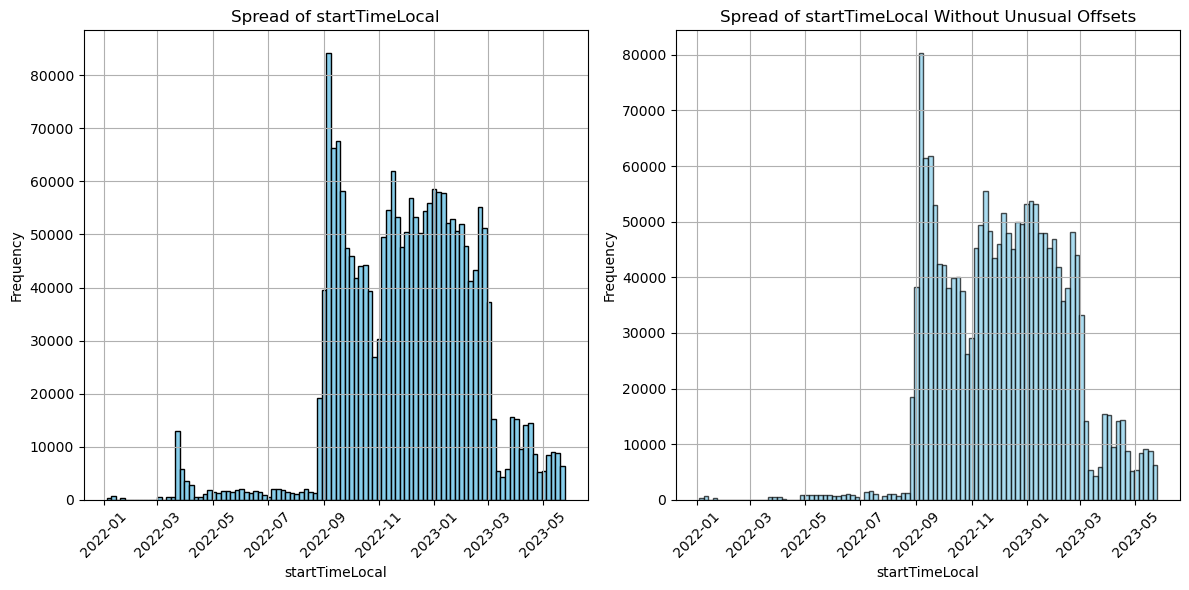

In [19]:
plt.figure(figsize=(12, 6))

# First subplot
plt.subplot(1, 2, 1)
plt.hist(df['startTimeLocal'], bins=100, color='skyblue', edgecolor='black')
plt.title('Spread of startTimeLocal')
plt.xlabel('startTimeLocal')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)

# Filter the dataset to exclude unusual offsets
filtered_df = df[df['startTimeOffsetInSeconds'].isin([7200, 10800])]
print('percentage of removed examples:',(len(df) - len(filtered_df)) / len(df))

# Second subplot
plt.subplot(1, 2, 2)
plt.hist(filtered_df['startTimeLocal'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Spread of startTimeLocal Without Unusual Offsets')
plt.xlabel('startTimeLocal')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


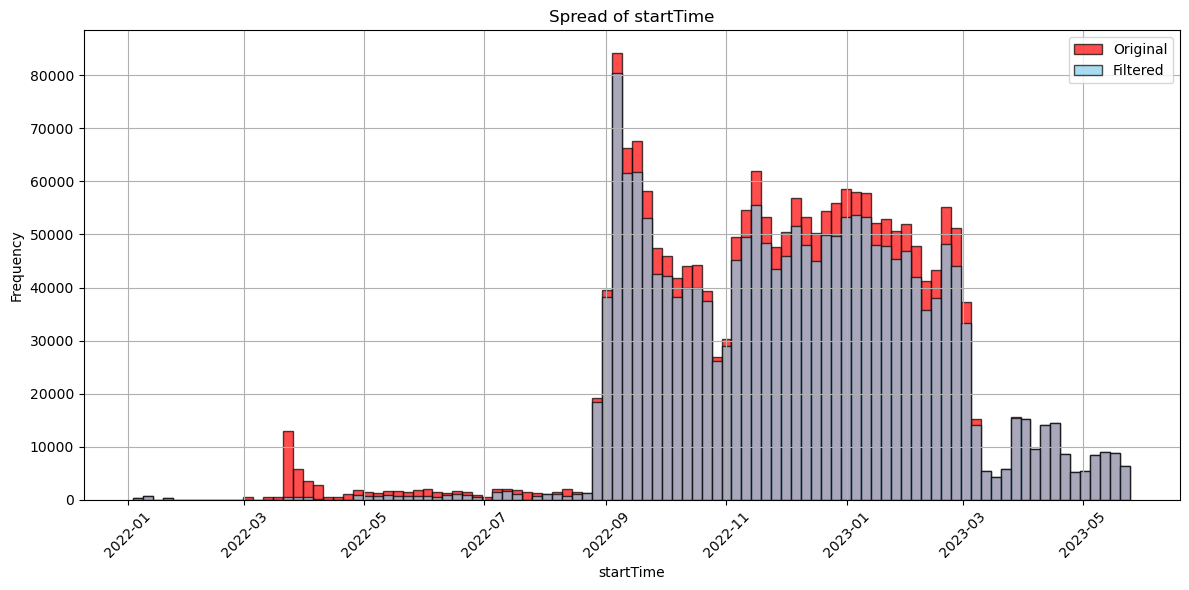

Percentage of removed examples: 0.10147521023869524


In [22]:
plt.figure(figsize=(12, 6))

# Original histogram
plt.hist(df['startTimeLocal'], bins=100, color='red', edgecolor='black', alpha=0.7, label='Original')

# Filtered histogram
filtered_df = df[df['startTimeOffsetInSeconds'].isin([7200, 10800])]
plt.hist(filtered_df['startTimeLocal'], bins=100, color='skyblue', edgecolor='black', alpha=0.7, label='Filtered')

# Adding titles and labels
plt.title('Spread of startTime')
plt.xlabel('startTime')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Print the percentage of removed examples
print('Percentage of removed examples:', (len(df) - len(filtered_df)) / len(df))


In [ ]:
df['intensity'].unique()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['activityType'], bins=5, color='skyblue', edgecolor='black')
plt.title('Spread of activity types')
plt.xlabel('activity type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
timestamp = 1650484963
dt_object = datetime.utcfromtimestamp(timestamp)

print("UTC datetime:", dt_object)


In [ ]:
timestamps = [
    1650484963, 1650485863, 1650485863, 1650486763, 1650487663,
    1650487663, 1650488563, 1650489463, 1650489463, 1650490363,
    1650491263, 1650492163, 1650493063, 1650493963
]

week_numbers = {}

for timestamp in timestamps:
    # Convert timestamp to datetime object
    dt_object = datetime.utcfromtimestamp(timestamp)
    
    # Extract week number
    week_number = dt_object.isocalendar()[1]  # ISO week number (1-53)
    
    # Store the week number for the timestamp
    if week_number not in week_numbers:
        week_numbers[week_number] = 1
    else:
        week_numbers[week_number] += 1

print("Week numbers and counts:")
for week_number, count in week_numbers.items():
    print("Week", week_number, ": Count =", count)


In [ ]:

# Convert timestamps to datetime objects
df['startTimeDate'] = pd.to_datetime(df['startTimeInSeconds'], unit='s')
df['date'] = df['startTimeDate'].dt.date

# Find the earliest and latest dates
earliest_date = df['date'].min()
latest_date = df['date'].max()

print("Earliest date:", earliest_date)
print("Latest date:", latest_date)

df['date'].value_counts()


In [ ]:

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['date'], bins=72, color='skyblue', edgecolor='black')
plt.title('Spread of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [8]:
def get_week_number(date):
    adjusted_date = date - pd.Timedelta(days=(date.weekday() + 1) % 7) #date of closest, prev sunday
    # print(adjusted_date)
    return adjusted_date.isocalendar()[1]

In [ ]:
rando_date = df['date'][0]
print(rando_date)
print(get_week_number(rando_date))

print(rando_date.isocalendar()[1])

In [ ]:
df['WeekNumber'] = df['date'].apply(get_week_number)

In [ ]:
df['WeekNumber'].value_counts()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['WeekNumber'], bins=52, color='skyblue', edgecolor='black')
plt.title('Spread of Week Numbers')
plt.xlabel('Week Number')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df['userId'].nunique() # number of soldiers

In [ ]:
entry_counts = df['userId'].value_counts()
entry_counts

In [ ]:
# Define the two dates
start_date = datetime.strptime('2022-01-03 15:30:00', '%Y-%m-%d %H:%M:%S')
end_date = datetime.strptime('2023-05-24 23:15:00', '%Y-%m-%d %H:%M:%S')

# Calculate the difference in weeks
difference_in_weeks = (end_date - start_date).days // 7

print("Number of weeks between the two dates:", difference_in_weeks)


In [ ]:
# Assuming df is your DataFrame and 'userId' is the column containing user IDs
user_id = '54f411e6-a9ae-4e48-94eb-1cefe8a2c99e'

# Filter the DataFrame based on the specified userID
user_df = df[df['userId'] == user_id]

# Now user_df contains only the rows corresponding to the specified userID
# user_df

plt.figure(figsize=(10, 6))
plt.hist(user_df['startTime'], bins=30, color='skyblue', edgecolor='black')
plt.title('Spread of Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
df["userId"].value_counts()

In [ ]:
df_user = df[df['userId'] == '00a7a796-c572-44d7-a950-7f6bca4a4394']
df_user

In [ ]:
for week_num in sorted(df_user['WeekNumber'].unique()):
    print(f'week number: {week_num}')
    df_user_week = df_user[df_user['WeekNumber'] == week_num]
    print(f'num of measurements: {df_user_week.shape[0]}')
    

In [ ]:
df_user_week4 = df_user[df_user['WeekNumber'] == 4][['userId','startTimeDate','activityType','intensity','activeTimeInSeconds','steps','distanceInMeters']]
df_user_week4

In [ ]:
# Define a function to determine the highest intensity
def highest_intensity(intensities):
    intensity_order = ['SEDENTARY', 'ACTIVE', 'HIGHLY_ACTIVE']
    return max(intensities, key=intensity_order.index)

# Define a function to determine the activity type with the most active time
def activity_with_most_active_time(group):
    print(group) # doesn't have activeTimeInSeconds
    return group.loc[group['activeTimeInSeconds'].idxmax()]['activityType']

# Define the aggregation dictionary with the activity type logic
agg_dict = {
    'steps': 'sum',
    'userId': 'first',  # assuming userId remains the same for each startTimeDate
    'intensity': highest_intensity,  # using the custom function to get the highest intensity
    # 'activityType': activity_with_most_active_time,  # using the custom function to get the activity type with most active time TODO: fix
    'activeTimeInSeconds': 'sum',  # summing activeTimeInSeconds for each group
    'distanceInMeters': 'sum',
    
}

In [ ]:
for date, group in df_user_week4.groupby('startTimeDate'):
    print(type(date))
    print(type(group))

In [ ]:
grouped_df_user_week4 = df_user_week4.groupby('startTimeDate').agg(agg_dict).reset_index()
grouped_df_user_week4

In [ ]:
df_user_week35 = df_user[df_user['WeekNumber'] == 35][['userId','startTimeDate','activityType','intensity','activeTimeInSeconds','steps','distanceInMeters']]
df_user_week35

In [ ]:
grouped_df_user_week35 = df_user_week35.groupby('startTimeDate').agg(agg_dict).reset_index()
grouped_df_user_week35